In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dfAtt = pd.read_csv(r"unique_attendance_15/presenza_tot.csv")

# Read the CSV file
# Replace 'your_file.csv' with your actual file path
df10 = pd.read_csv('particulate_matter/PM10-sensors.csv')


df10.head
# Display initial info about NaN values
print("Initial NaN count per column:")
print(df10.isnull().sum())

# Option 1: Remove rows with any NaN values
df10_clean = df10.dropna()

# Option 2: Fill NaN values with mean of the column
#df10_clean = df10.fillna(df10_clean.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
df10_clean = df10.fillna(0)

print("\nShape before cleaning:", df10.shape)
print("Shape after cleaning:", df10_clean.shape)



Initial NaN count per column:
Time          0
Sensor1     231
Sensor2    2313
Sensor3    1703
dtype: int64

Shape before cleaning: (10005, 4)
Shape after cleaning: (10005, 4)


In [3]:
df25 = pd.read_csv('particulate_matter/PM2.5-sensors.csv')


df25.head
# Display initial info about NaN values
print("Initial NaN count per column:")
print(df25.isnull().sum())

# Option 1: Remove rows with any NaN values
#df_clean = df10.dropna()

# Option 2: Fill NaN values with mean of the column
#df25_clean = df25.fillna(df25.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
df25_clean = df25.fillna(0)

print("\nShape before cleaning:", df25.shape)
print("Shape after cleaning:", df25_clean.shape)

Initial NaN count per column:
Time          0
Sensor1     231
Sensor2    2313
Sensor3    1703
dtype: int64

Shape before cleaning: (10005, 4)
Shape after cleaning: (10005, 4)


In [57]:
dfAtt0 =dfAtt[dfAtt['areaAnalisi'].str.contains('Intero Comune')].sort_values(by=['datetime'], ascending=True)
dfAtt0['datetime'] = pd.to_datetime(dfAtt0['datetime'])

normalized_dataAtt = (dfAtt0['value'] - dfAtt0['value'].min()) / (dfAtt0['value'].max() - dfAtt0['value'].min())

In [58]:
dfAtt0

,datetime,value,areaAnalisi
1330,2024-08-01 00:00:00,174873,Intero Comune
1316,2024-08-01 00:15:00,174272,Intero Comune
1302,2024-08-01 00:30:00,173870,Intero Comune
1288,2024-08-01 00:45:00,173620,Intero Comune
1274,2024-08-01 01:00:00,173317,Intero Comune
...,...,...,...
91448,2024-10-08 20:45:00,201637,Intero Comune
91434,2024-10-08 21:00:00,201085,Intero Comune
91420,2024-10-08 21:15:00,200494,Intero Comune
91406,2024-10-08 21:30:00,199911,Intero Comune


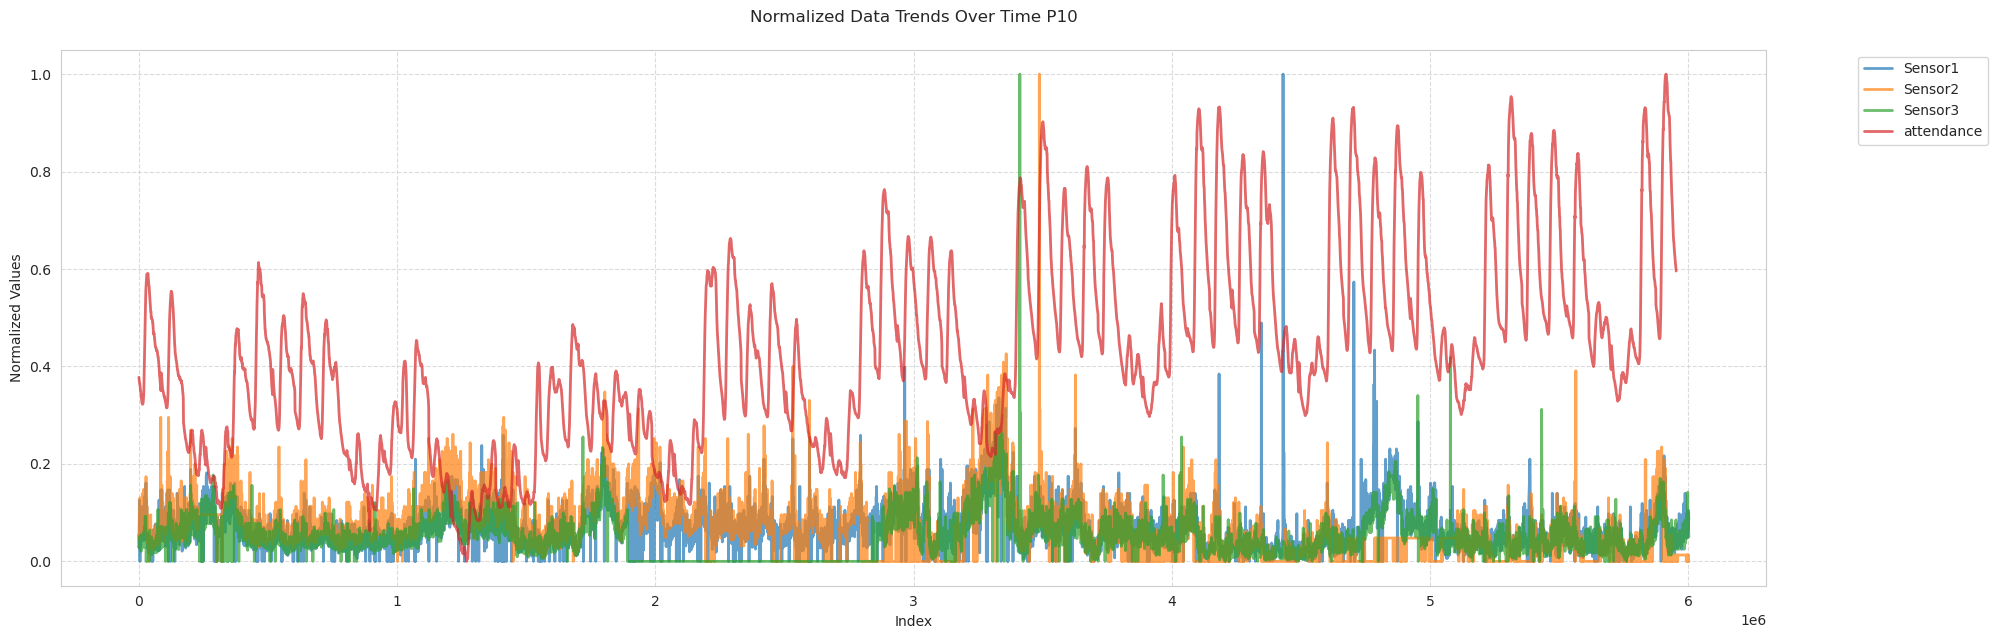

In [59]:
# Create a figure with subplots: line plots and correlation heatmap
fig = plt.figure(figsize=(20, 12))

# Define grid layout
gs = fig.add_gridspec(2, 2)

# 1. Line plots of all numeric columns
ax1 = fig.add_subplot(gs[0, :])  # Top row, full width

# Get numeric columns
numeric_cols = df10_clean.select_dtypes(include=[np.number]).columns

# Plot each numeric column
for column in numeric_cols:
    # Normalize data to make trends comparable
    normalized_data = (df10_clean[column] - df10_clean[column].min()) / (df10_clean[column].max() - df10_clean[column].min())
    # ax1.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)
    seconds = (pd.to_datetime(df10_clean.Time).astype(int)//10**9) - 1722470400 # convert in seconds from 2024-08-01 00:00:00
    ax1.plot(seconds, normalized_data, label=column, linewidth=2, alpha=0.7)

seconds = (pd.to_datetime(dfAtt0.datetime).astype(int)//10**9) - 1722470400 # convert in seconds from 2024-08-01 00:00:00
ax1.plot(seconds, normalized_dataAtt, label="attendance", linewidth=2, alpha=0.7)

ax1.set_title('Normalized Data Trends Over Time P10', pad=20)
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. plot 25
# ax2 = fig.add_subplot(gs[1, :])  # Bottom row, full width
# 
# 
# # Get numeric columns
# numeric_cols = df25_clean.select_dtypes(include=[np.number]).columns
# 
# # Plot each numeric column
# for column in numeric_cols:
#     # Normalize data to make trends comparable
#     normalized_data = (df25_clean[column] - df25_clean[column].min()) / \
#                      (df25_clean[column].max() - df25_clean[column].min())
#     ax2.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)
# 
# ax2.set_title('Normalized Data Trends Over Time P2.5', pad=20)
# ax2.set_xlabel('Index')
# ax2.set_ylabel('Normalized Values')
# ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# ax2.grid(True, linestyle='--', alpha=0.7)

#


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [71]:
# windowSize = 4
windowSize = 96

dfAtt0 =dfAtt[dfAtt['areaAnalisi'].str.contains('Intero Comune')].sort_values(by=['datetime'], ascending=True)
dfAtt0['datetime'] = pd.to_datetime(dfAtt0['datetime'])
dfAtt0 = (
    dfAtt0
    .assign(value_1h=dfAtt0.rolling(window=windowSize)['value'].mean())
    # .groupby(dfAtt0['datetime'].dt.date)['rolling_1h_avg']
    # .last()
)
dfAtt0 = dfAtt0.reset_index(drop=True)

dfAtt0 = dfAtt0.iloc[windowSize-1:dfAtt0.shape[0]:windowSize]
dfAtt0 = dfAtt0.reset_index(drop=True)

normalized_dataAtt = (dfAtt0['value_1h'] - dfAtt0['value_1h'].min()) / (dfAtt0['value_1h'].max() - dfAtt0['value_1h'].min())

In [72]:
dfAtt0

,datetime,value,areaAnalisi,value_1h
0,2024-08-01 23:45:00,171783,Intero Comune,182666.656250
1,2024-08-02 23:45:00,170031,Intero Comune,177945.312500
2,2024-08-03 23:45:00,154675,Intero Comune,158447.510417
3,2024-08-04 23:45:00,162008,Intero Comune,151934.687500
4,2024-08-05 23:45:00,166242,Intero Comune,172720.031250
...,...,...,...,...
63,2024-10-03 23:45:00,188927,Intero Comune,205919.125000
64,2024-10-04 23:45:00,189385,Intero Comune,201407.083333
65,2024-10-05 23:45:00,176657,Intero Comune,184947.239583
66,2024-10-06 23:45:00,182573,Intero Comune,176384.947917


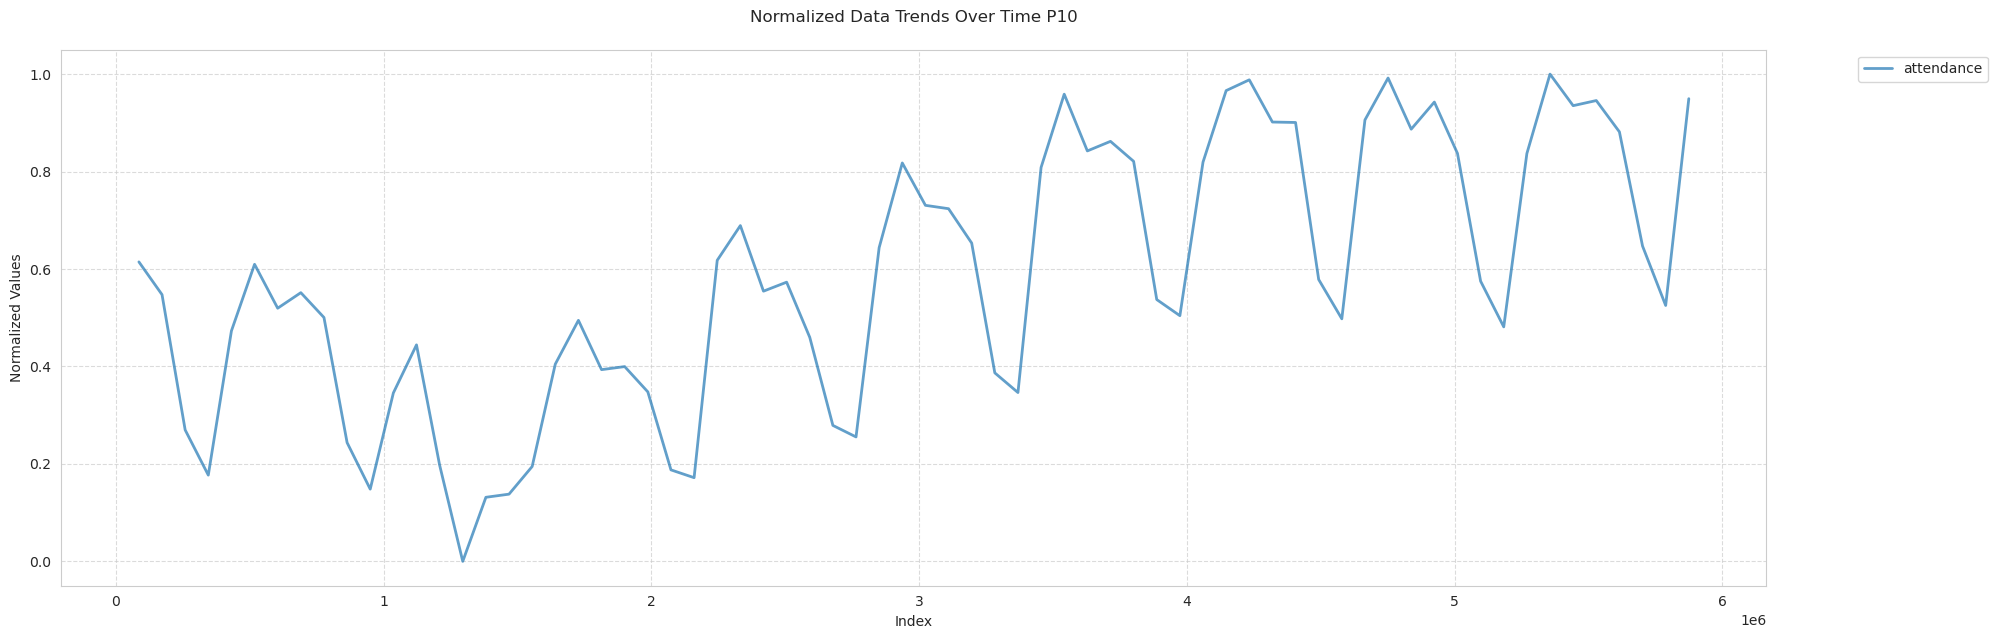

In [73]:
fig = plt.figure(figsize=(20, 12))

# Define grid layout
gs = fig.add_gridspec(2, 2)

# 1. Line plots of all numeric columns
ax1 = fig.add_subplot(gs[0, :])  # Top row, full width

seconds = (pd.to_datetime(dfAtt0.datetime).astype(int)//10**9) - 1722470400 # convert in seconds from 2024-08-01 00:00:00
ax1.plot(seconds, normalized_dataAtt, label="attendance", linewidth=2, alpha=0.7)

ax1.set_title('Normalized Data Trends Over Time', pad=20)
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Optional: Save the plot
# plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')

# Display statistical summary
print("\nStatistical Summary P10:")
print(df10_clean.describe())

print("\nStatistical Summary P2.5:")
print(df25_clean.describe())

In [ ]:
# Display significant correlations (absolute value > 0.5)
print("\nSignificant correlations (absolute value > 0.5):")
significant_corr = pd.DataFrame()
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if abs(correlation_matrix.loc[index, column]) > 0.5 and index != column:
            significant_corr = pd.concat([significant_corr, 
                pd.DataFrame({'Variable 1': [index], 
                            'Variable 2': [column],
                            'Correlation': [correlation_matrix.loc[index, column]]})
            ])

if not significant_corr.empty:
    print(significant_corr.sort_values('Correlation', ascending=False))

# Optional: Add subplot with individual line plots
def plot_individual_trends(data, columns, rows=2, cols=2):
    """
    Create individual line plots for specified columns
    """
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, column in enumerate(columns[:rows*cols]):
        axes[idx].plot(data.index, data[column], linewidth=2)
        axes[idx].set_title(f'{column} Over Time')
        axes[idx].set_xlabel('Index')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

In [ ]:


# Show the plot
plt.show()